In [2]:
## This is to perform k means clustering on the compounds
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# Load the CSV file
df = pd.read_csv("pca_results_with_ID.csv")

# Separate the features and ID
ids = df['id']
x = df.drop(columns=['id'])

In [4]:
#determining the k value using the elbow method and the silhoutte method
#first the elbow method.
#second the silhouette method.
wcss = []  # Within-Cluster Sum of Squares
k_range = range(1, 12)  # Test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



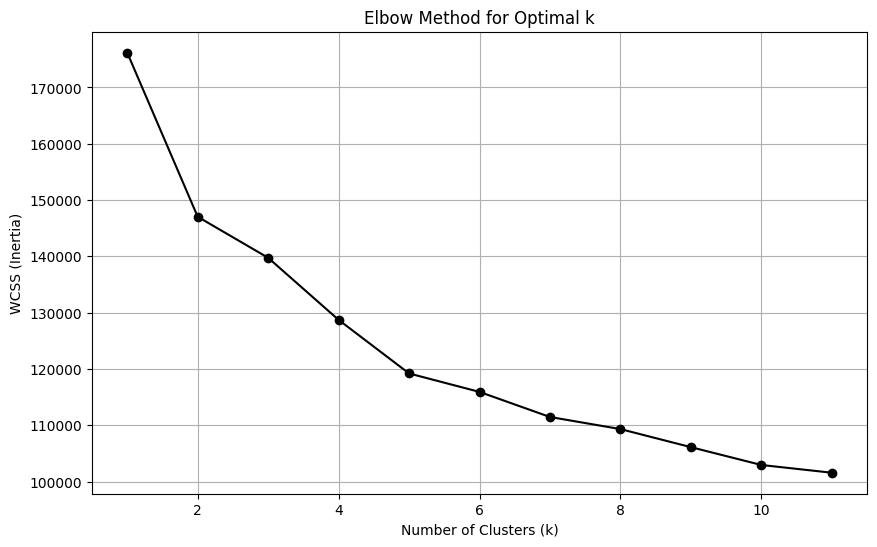

In [5]:
# Plot SSE (Elbow method)
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='black')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()
#plt.savefig('elbow_method.png')

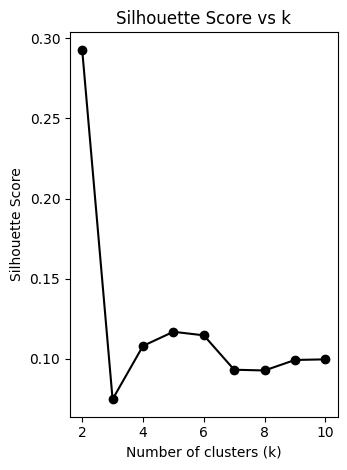

In [6]:
silhouette_scores = []

for k in range(2, 11):  # Silhouette score requires k >= 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot silhouette score
plt.subplot(1, 2, 2)
plt.plot(range(2,11), silhouette_scores, marker='o', color='black')
plt.title("Silhouette Score vs k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()
#plt.savefig('silhoutte_score.png')

In [7]:
#Perform K-Means Clustering with Optimal k from elbow method
optimal_k = 8
# Fit KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X)
# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

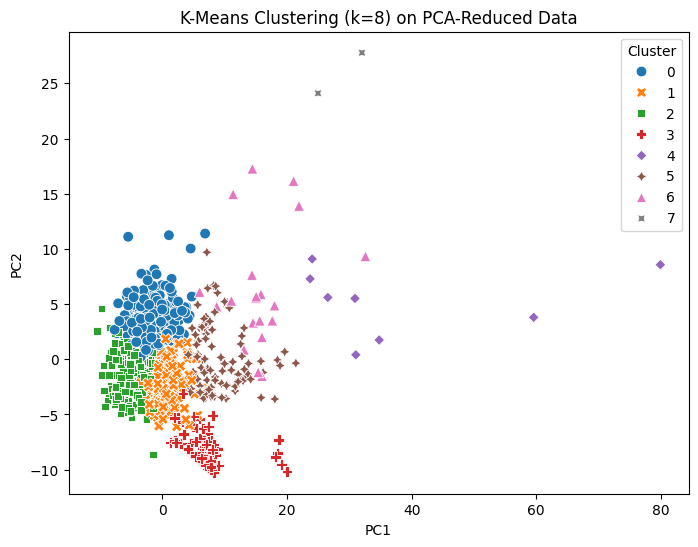

In [8]:
#visualizing the data using the first two pcs
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='tab10', s= 60, style='Cluster')
plt.title(f'K-Means Clustering (k={optimal_k}) on PCA-Reduced Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
#plt.show()
plt.savefig('KmeansLcluster.png')


In [ ]:
#df.to_csv("clustered_pca_data.csv", index=False)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['PC1'], df['PC2'], df['PC3'], c=df['Cluster'], cmap='inferno', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(f'3D Cluster Visualization (k={optimal_k})')
plt.colorbar(scatter, label='Cluster')
#plt.show()
plt.savefig('3D kmeans clusters.png')

In [ ]:
#distribution of compounds in each cluster
 #Assuming 'df' contains your clustered data with a 'Cluster' column

cluster_counts = df['Cluster'].value_counts().sort_index()

print("Items per cluster:")
print(cluster_counts)

In [ ]:
#visualizing the distribution
plt.figure(figsize=(8, 5))
bars = plt.bar(
    cluster_counts.index.astype(str),  # Cluster labels (e.g., '0', '1', '2')
    cluster_counts.values,            # Counts
    color='gray',  # Custom colors
    edgecolor='black'
)

# Add counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-position
        height + 1,                         # Y-position (offset)
        f'{int(height)}',                   # Text
        ha='center',                        # Horizontal alignment
        va='bottom',                        # Vertical alignment
        fontsize=10
    )

# Customize the plot
plt.xlabel('Cluster Number', fontsize=12)
plt.ylabel('Number of compounds', fontsize=12)
plt.title('Distribution of Compounds Across Clusters', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#plt.show()
plt.savefig('cluster_distribution.png', dpi=300, bbox_inches='tight')

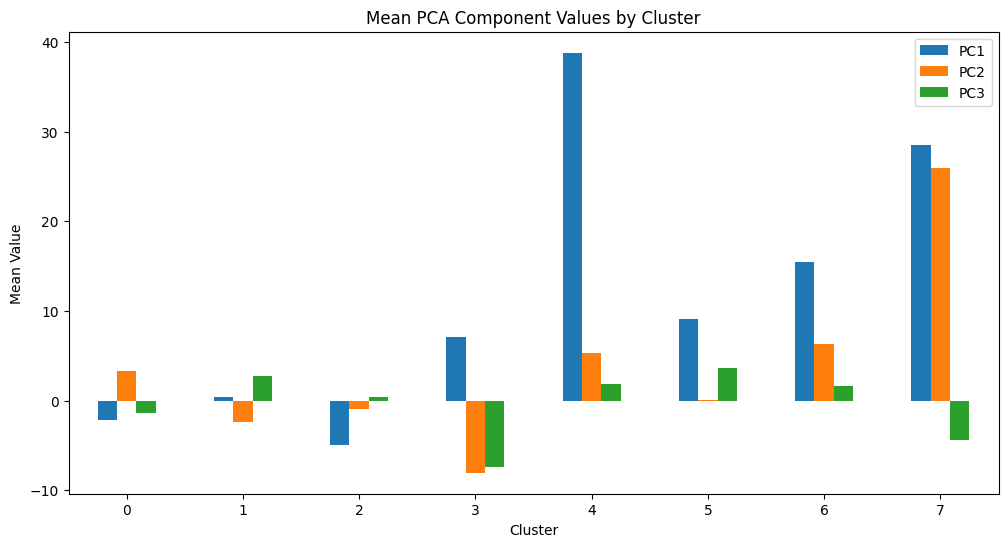

In [ ]:
#cluster profiles
# Calculate mean values for each cluster
cluster_profiles = df.groupby('Cluster')[['PC1', 'PC2', 'PC3']].mean()

# Plot cluster profiles
cluster_profiles.plot(kind='bar', figsize=(12, 6))
plt.title('Mean PCA Component Values by Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()
#plt.savefig('cluster_profiles_kmeans.png')

In [9]:
#performing clustering evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Extract features (PCA columns) and cluster labels
Xx = df[[col for col in df.columns if col.startswith("PC")]]
labels = df['Cluster']

# Compute evaluation metrics
silhouette = silhouette_score(Xx, labels)
davies_bouldin = davies_bouldin_score(Xx, labels)
calinski_harabasz = calinski_harabasz_score(Xx, labels)

silhouette, davies_bouldin, calinski_harabasz


(0.09269141801992971, 2.023272944590423, 86.4682511933502)